In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [2]:
def couchy(x):
    return 1/(1 + x**2)

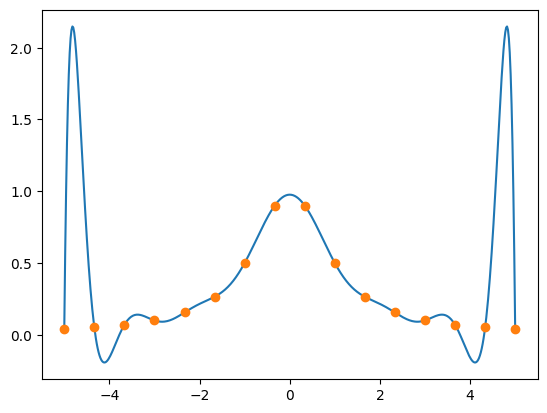

In [12]:
n = 16
x = np.linspace(-5, 5, n)
y = couchy(x)

X = np.linspace(-5, 5, 500)
plt.plot(X, sum([a*X**j for j, a in enumerate((np.linalg.inv(np.vander(x, increasing=True)) @ y))]))
plt.plot(x, y, 'o')

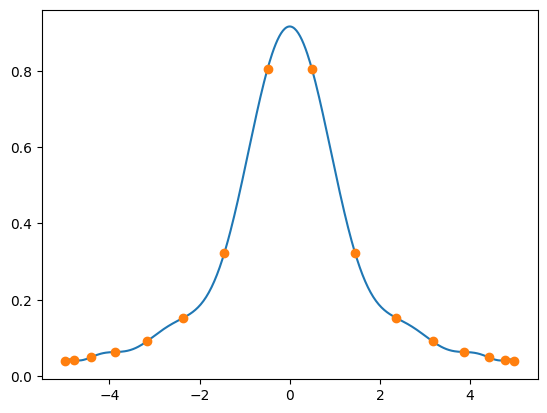

In [4]:
n = 16
x = 5*np.stack([np.cos(np.pi*(2*k - 1)/(2*n)) for k in range(1, n+1)])
y = couchy(x)

X = np.linspace(-5, 5, 500)
plt.plot(X, sum([a*X**j for j, a in enumerate((np.linalg.inv(np.vander(x, increasing=True)) @ y))]))
plt.plot(x, y, 'o')

(-0.2, 1.0)

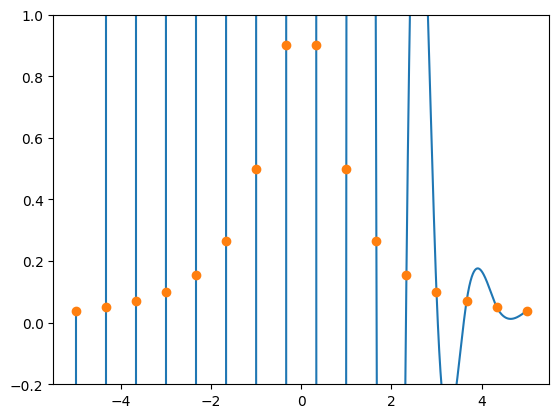

In [96]:
G1 = np.eye(n-1) + np.diagflat([4]*(n-2), k=1) + np.diagflat([1]*(n-3), k=2)
G2 = np.eye(n-1) + np.diagflat([-2]*(n-2), k=1) + np.diagflat([1]*(n-3), k=2)
G3 = -np.eye(n) + np.diagflat([1]*(n-1), k=1)
G4 = 2*np.eye(n) + np.diagflat([1]*(n-1), k=1)
h = x[1] - x[0]
A = y
D2x_phi = 37/4394
cn = D2x_phi/2
C = np.r_[(3/h**2)*(np.linalg.inv(G1) @ ((G2 @ A[:-1]) + np.r_[[0]*(n-2), A[-1] - cn])), cn]
D = (1/(3*h))*G3 @ C
B = (G3 @ A)/h - (h/3)*(G4 @ C)

for j, (a, b, c, d) in enumerate(zip(A[:-1], B[:-1], C[:-1], D[:-1])):
    X = np.linspace(x[j], x[j+1], 500)
    plt.plot(X, a + b*(X - x[j]) + c*(X - x[j])**2 + d*(X - x[j])**3, 'C0-')
plt.plot(x, y, 'C1o')
plt.ylim(-0.2, 1)

In [28]:
from scipy.interpolate import CubicSpline

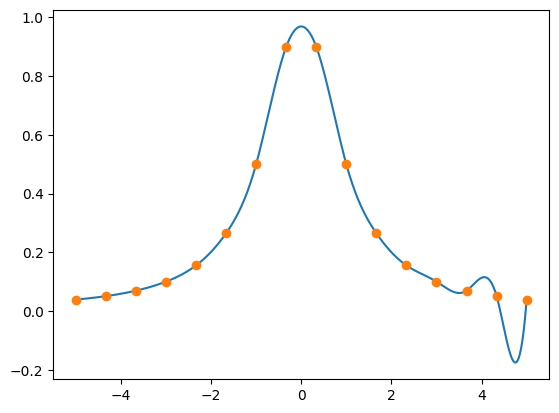

In [101]:
cs = CubicSpline(x, y, bc_type=[(2, 0), (2, 10)])
X = np.linspace(-5, 5, 500)
plt.plot(X, cs(X))
plt.plot(x, y, 'o')